In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
print('training data shape:', x_train.shape)
print('training labels shape:', y_train.shape)
print('training data shape:', x_test.shape)
print('training labels shape:', y_test.shape)

training data shape: (50000, 32, 32, 3)
training labels shape: (50000, 1)
training data shape: (10000, 32, 32, 3)
training labels shape: (10000, 1)


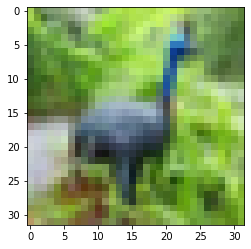

In [3]:
plt.imshow(x_train[6])

In [4]:
y_train[6]

array([2], dtype=uint8)

In [5]:
label_dict = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [6]:
label_dict[y_train[6][0]]

'bird'

In [7]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [8]:
#对图像进行数字标准化
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [9]:
model = tf.keras.models.Sequential() #建立Squential先行堆叠模型
#第一个卷积层
model.add(tf.keras.layers.Conv2D(filters = 32,
                                  kernel_size = (3, 3),
                                  input_shape = (32, 32, 3),
                                  activation = 'relu',
                                  padding = 'same'))
model.add(tf.keras.layers.Dropout(rate=0.3))#防止过拟合
model.add(tf.keras.layers.MaxPool2D())#第一池化层
#第二个卷积层
model.add(tf.keras.layers.Conv2D(filters = 64,
                                  kernel_size = (3, 3),
                                  activation = 'relu',
                                  padding = 'same'))
model.add(tf.keras.layers.Dropout(rate=0.3))#防止过拟合
model.add(tf.keras.layers.MaxPool2D())#第二池化层
model.add(tf.keras.layers.Flatten())#平坦层
model.add(tf.keras.layers.Dense(128, activation='relu'))#全连接层
model.add(tf.keras.layers.Dense(10, activation='softmax'))#输出层

In [10]:
train_epoch = 10
batch_size = 100

In [11]:
model.compile(optimizer='adam',#优化器
              loss = 'sparse_categorical_crossentropy',#损失函数
              metrics = ['accuracy'])#评估模型的方式

In [12]:
train_history = model.fit(x_train, y_train,
                          validation_split = 0.2,
                          epochs = train_epoch,
                          batch_size = batch_size,
                          verbose = 3)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [13]:
#训练过程可视化
def visu_train_history(train_history, train_metric, validation_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[validation_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

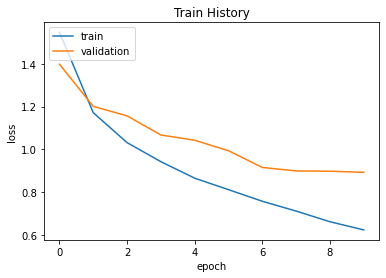

In [14]:
visu_train_history(train_history, 'loss', 'val_loss')

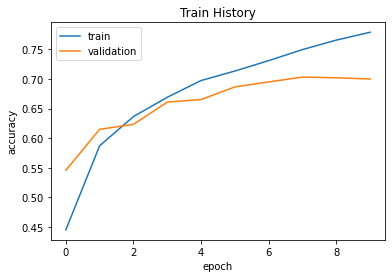

In [15]:
visu_train_history(train_history, 'accuracy', 'val_accuracy')

In [16]:
#模型评估
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

10000/10000 - 2s - loss: 0.8909 - accuracy: 0.6975
Test accuracy: 0.6975


In [17]:
preds = model.predict_classes(x_test)
preds

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [19]:
#预测结果可视化
def plot_images_labels_prediction(images,#图象列表
                                  labels,#标签列表
                                  preds,#预测值列表
                                  index,#从第index个开始
                                  num = 5):#显示数默认值
    fig = plt.gcf()
    fig.set_size_inches(12, 6)
    if num > 10:
        num = 10
    for i in range(0, num):
        ax = plt.subplot(2, 5, i+1)
        ax.imshow(images[index])
        title = str(i) + ',' + label_dict[labels[index][0]]
        if len(preds) > 0:
            title += '=>' + label_dict[preds[index]]
        ax.set_title(title, fontsize=10)
        index += 1
    plt.show()

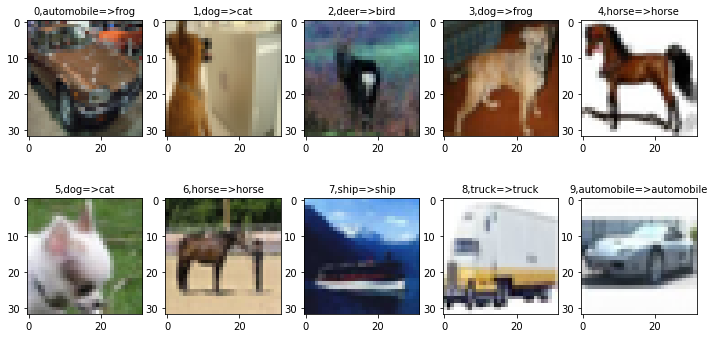

In [20]:
plot_images_labels_prediction(x_test,
                              y_test,
                              preds,2000,10)